In [6]:
import numpy as np
from deepsy.core.model import Model
from deepsy.core.nn import NeuralNetwork
from deepsy.core.layer import Layer
from deepsy.core.functions.activation_functions import *
from deepsy.core.functions.loss_functions import *
from deepsy.core.functions.optimizers import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
dataset = pd.read_csv('data/regression/Student_Performance.csv')
Y = dataset['Performance Index']
X = dataset.drop(columns=['Performance Index'])
X = pd.get_dummies(X, columns=['Extracurricular Activities'])

X = (X - X.mean()) / X.std()
Y = Y / 100

X, Y = X.values, Y.values

print('Dataset shape: {}'.format(dataset.shape))
print()
print('Dataset head:')
print(dataset.head())
print()
print('X first 5:')
print(X[:5])
print()
print('Y first 5:')
print(Y[:5])
print()

Dataset shape: (10000, 6)

Dataset head:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

X first 5:
[[ 0.77514895  1.70409044  1.45613179 -1.24969145 -1.01040412  1.01040412]
 [-0.38346141  0.72387648 -1.49221962 -0.9009371   0.98960404 -0.98

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

nn = NeuralNetwork(layers=[
    Layer(nr_neurons=8, nr_in_features=6, activation_func=ReLU()),
    Layer(nr_neurons=12, nr_in_features=8, activation_func=ReLU()),
    Layer(nr_neurons=1, nr_in_features=12, activation_func=ReLU())
])

model = Model(nn, loss_func=MSE(), optimizer=GradientDescent(0.2))
model.train(X_train.T, Y_train.T, 400)

Epoch 1: cost = 1.384093205239047
Epoch 2: cost = 1.3524348182000974
Epoch 3: cost = 1.3299459575337385
Epoch 4: cost = 1.3121812424992039
Epoch 5: cost = 1.2931077179529409
Epoch 6: cost = 1.2708239360124287
Epoch 7: cost = 1.2510143794785435
Epoch 8: cost = 1.2331213636198404
Epoch 9: cost = 1.217584533238864
Epoch 10: cost = 1.2039508953146114
Epoch 11: cost = 1.1921091178562329
Epoch 12: cost = 1.1792521692970863
Epoch 13: cost = 1.1604075048293152
Epoch 14: cost = 1.1443654631217675
Epoch 15: cost = 1.1305177250024974
Epoch 16: cost = 1.1149885211210817
Epoch 17: cost = 1.0937749954754752
Epoch 18: cost = 1.0100838208302505
Epoch 19: cost = 0.8161281784211946
Epoch 20: cost = 0.6238210128418594
Epoch 21: cost = 0.5159293301621847
Epoch 22: cost = 0.4510292478993961
Epoch 23: cost = 0.39835666549851206
Epoch 24: cost = 0.3414378026348553
Epoch 25: cost = 0.31521879431273003
Epoch 26: cost = 0.3477939280165701
Epoch 27: cost = 0.47302878399450626
Epoch 28: cost = 0.8007719234415588


In [9]:
Y_predicted, cost = model.validate(X_test.T, Y_test.T)
print('Cost: {}'.format(cost))

for i in range(len(Y_predicted[0])):
    print('predicted: {}   actual: {}'.format(Y_predicted[0][i], Y_test[i]))

Cost: 0.003360855381155173
predicted: 0.5267411305324587   actual: 0.63
predicted: 0.515513757800611   actual: 0.56
predicted: 0.6885979738235806   actual: 0.64
predicted: 0.41407688082954647   actual: 0.46
predicted: 0.6711670369829343   actual: 0.71
predicted: 0.5898309127566335   actual: 0.61
predicted: 0.6365024666262183   actual: 0.63
predicted: 0.41808723058614694   actual: 0.41
predicted: 0.4824994342298608   actual: 0.59
predicted: 0.7407309549855603   actual: 0.8
predicted: 0.19849505170683154   actual: 0.18
predicted: 0.6228383730365199   actual: 0.67
predicted: 0.4606522257040432   actual: 0.47
predicted: 0.702218350127437   actual: 0.69
predicted: 0.5089345660784865   actual: 0.5
predicted: 0.628617657013808   actual: 0.65
predicted: 0.6591989968976681   actual: 0.69
predicted: 0.6508969519459717   actual: 0.74
predicted: 0.35005959004196724   actual: 0.39
predicted: 0.38734292911803714   actual: 0.51
predicted: 0.19101277987539228   actual: 0.24
predicted: 0.52482550764858

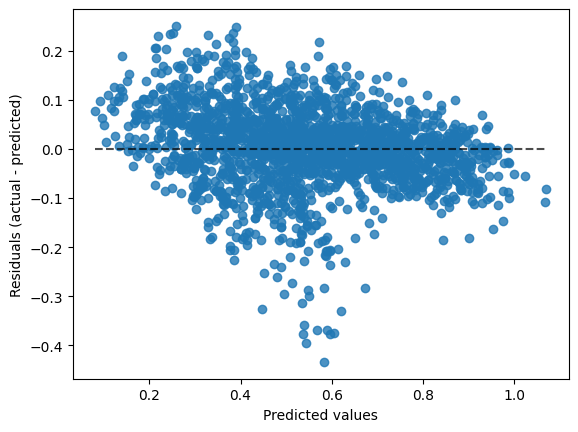

In [10]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

display = PredictionErrorDisplay(y_true=Y_test, y_pred=Y_predicted)
display.plot()
plt.show()